___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Improt Libraries & Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv("Churn_Modelling.csv")

# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [3]:
df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2      0.000              1          1               1   
1       1  83807.860              1          0               1   
2       8 159660.800              3          1               0   
3       1      0.000              2          0               0   
4       2 125510.820              1          1               1   

   EstimatedSalary  Exited  
0       101348.880       1  
1       112542.580       0  
2       113931.570       1  
3        93826.630       0  
4        79084.100       0

In [4]:
df.shape

(10000, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.isnull().sum().any()

False

In [7]:
df.describe().T

count         mean       std          min          25%  \
RowNumber       10000.000     5000.500  2886.896        1.000     2500.750   
CustomerId      10000.000 15690940.569 71936.186 15565701.000 15628528.250   
CreditScore     10000.000      650.529    96.653      350.000      584.000   
Age             10000.000       38.922    10.488       18.000       32.000   
Tenure          10000.000        5.013     2.892        0.000        3.000   
Balance         10000.000    76485.889 62397.405        0.000        0.000   
NumOfProducts   10000.000        1.530     0.582        1.000        1.000   
HasCrCard       10000.000        0.706     0.456        0.000        0.000   
IsActiveMember  10000.000        0.515     0.500        0.000        0.000   
EstimatedSalary 10000.000   100090.240 57510.493       11.580    51002.110   
Exited          10000.000        0.204     0.403        0.000        0.000   

                         50%          75%          max  
RowNumber           5000.500     7500.250    10000.000  
CustomerId      15690738.000 15753233.750 15815690.000  
CreditScore          652.000      718.000      850.000  
Age                   37.000       44.000       92.000  
Tenure                 5.000        7.000       10.000  
Balance            97198.540   127644.240   250898.090  
NumOfProducts          1.000        2.000        4.000  
HasCrCard              1.000        1.000        1.000  
IsActiveMember         1.000        1.000        1.000  
EstimatedSalary   100193.915   149388.247   199992.480  
Exited                 0.000        0.000        1.000

## Row Number, Customer ID, Surname

In [8]:
df.drop(["RowNumber", "CustomerId", "Surname"], axis=1, inplace=True)

In [10]:
df.Exited.value_counts() #unbalanced distribution

0    7963
1    2037
Name: Exited, dtype: int64

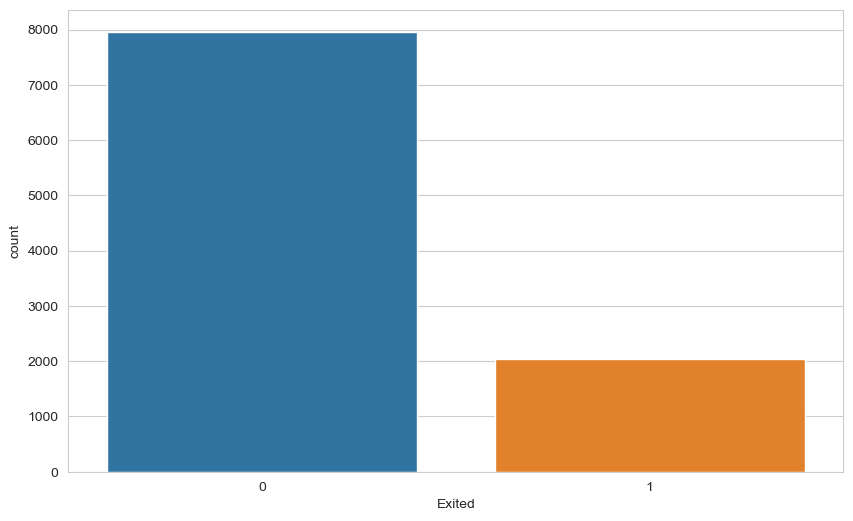

In [17]:
sns.countplot(df["Exited"])
plt.show()

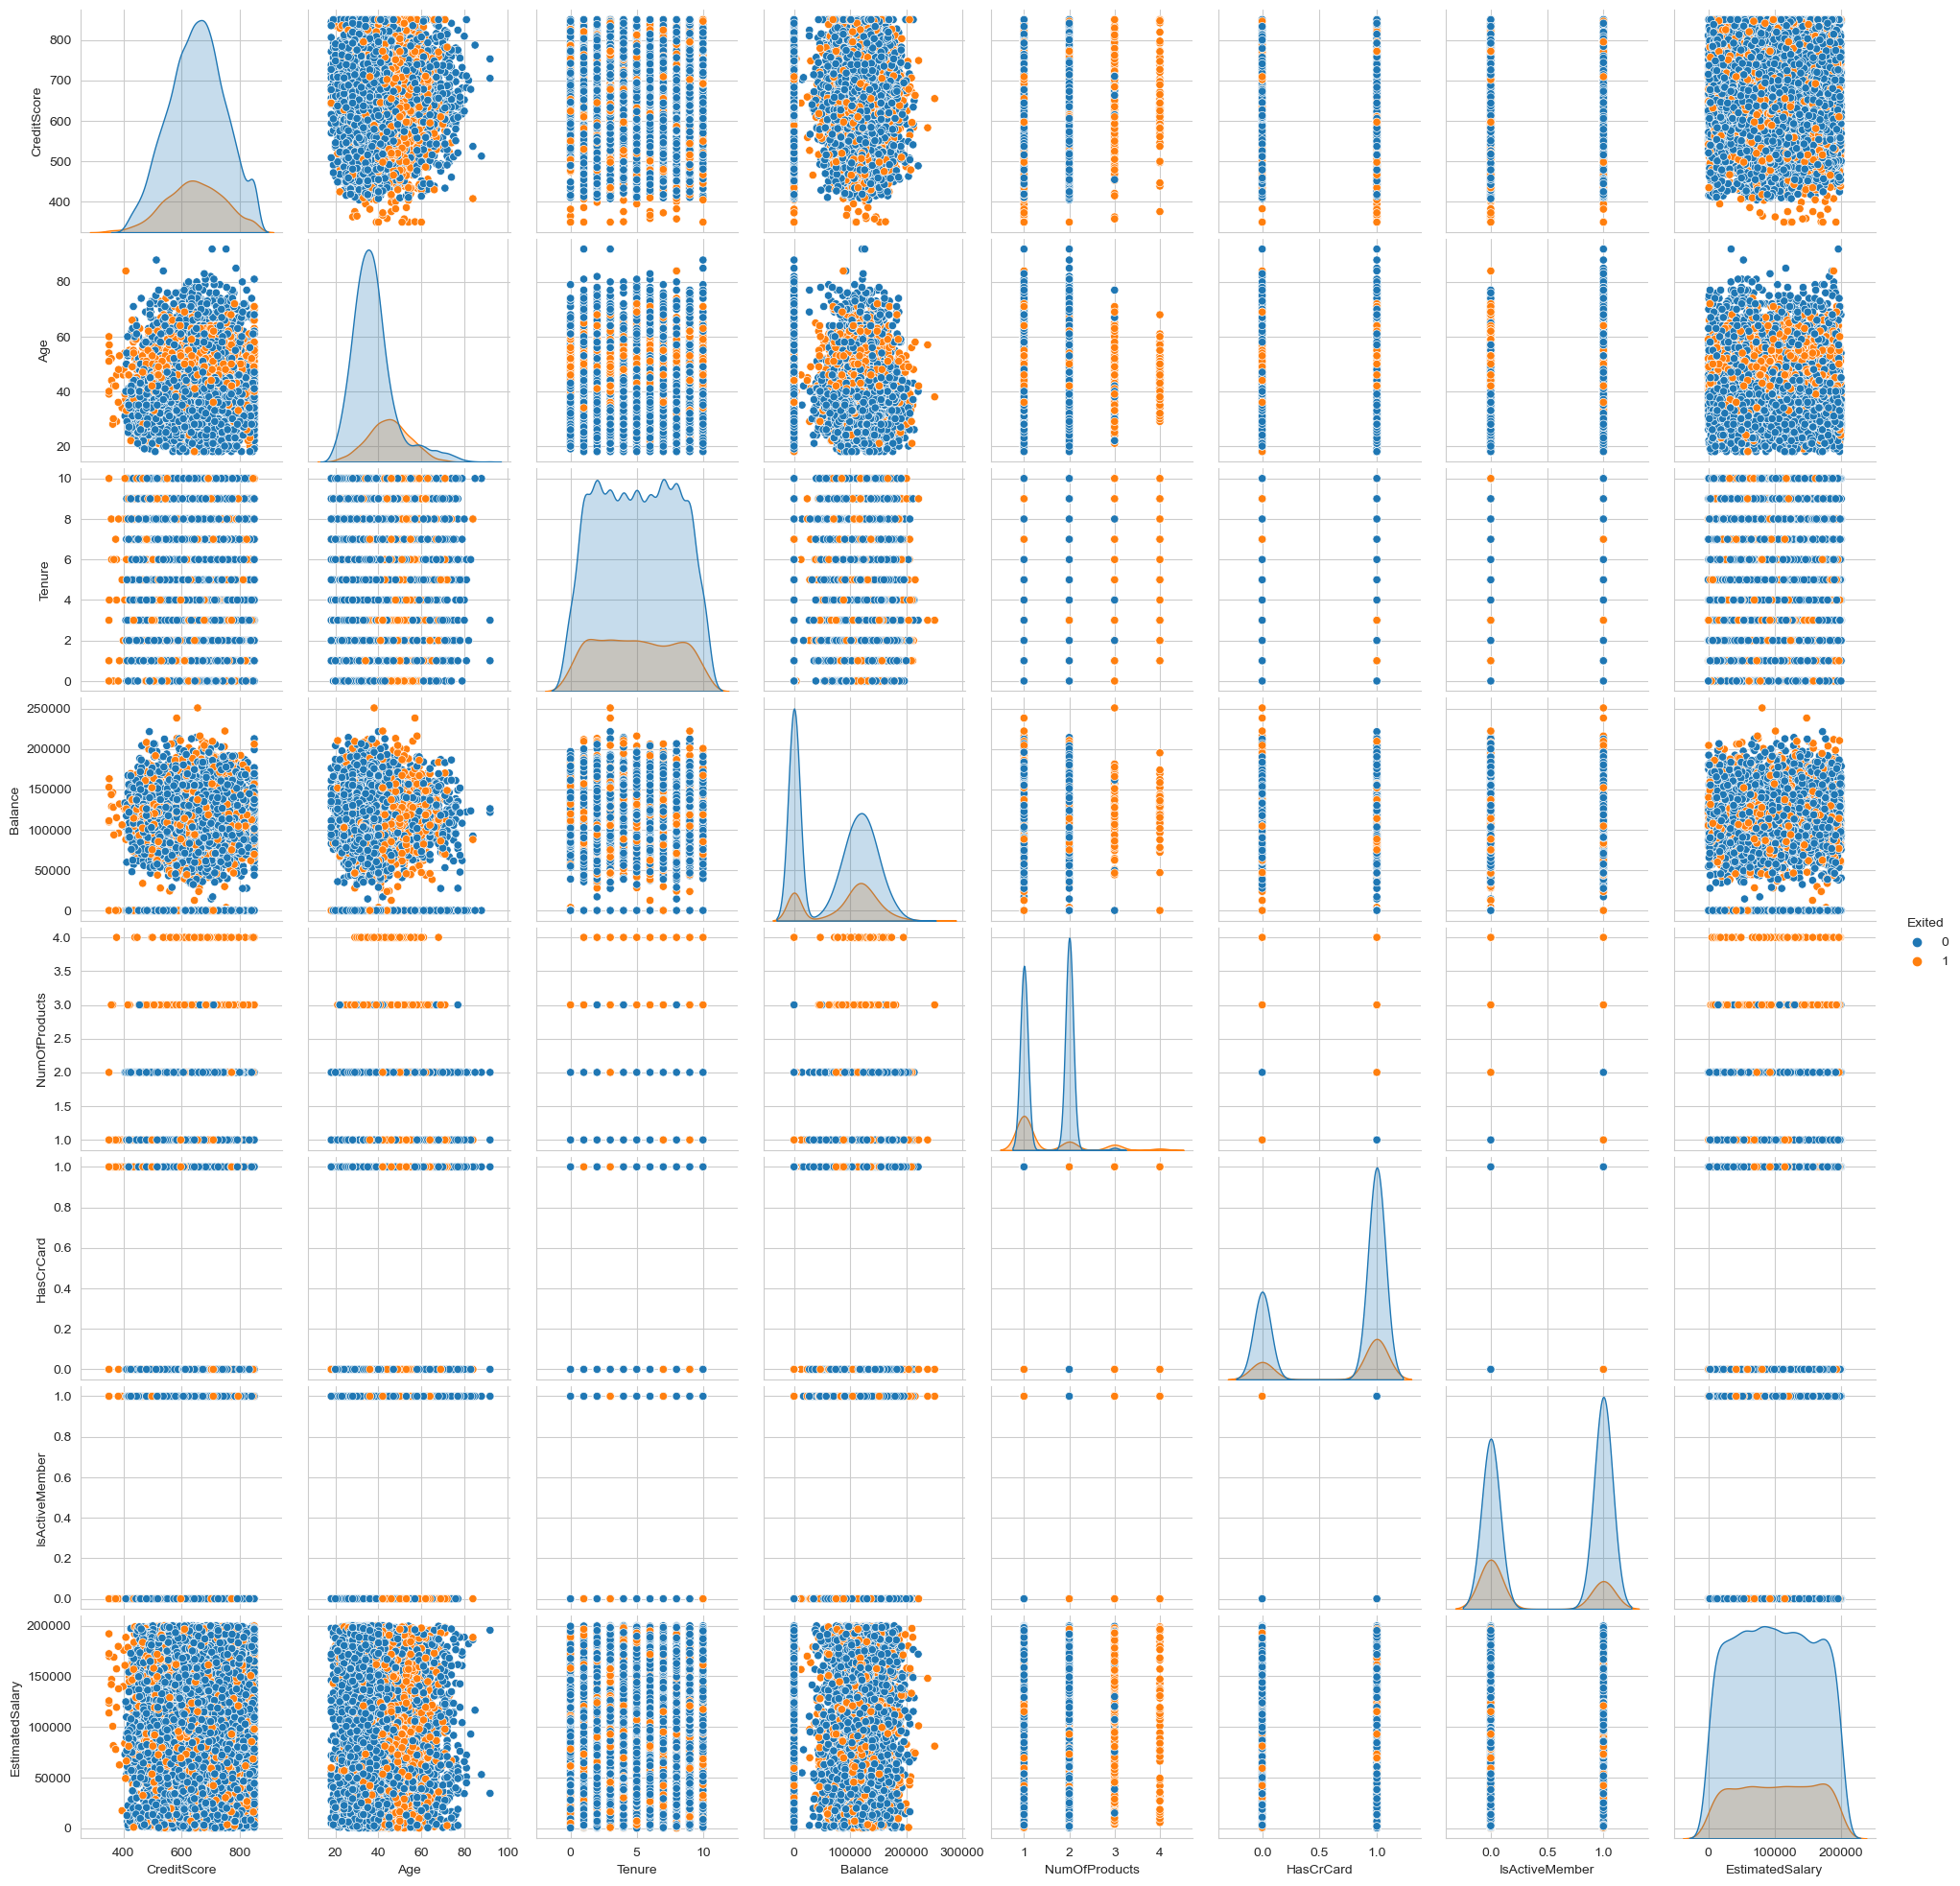

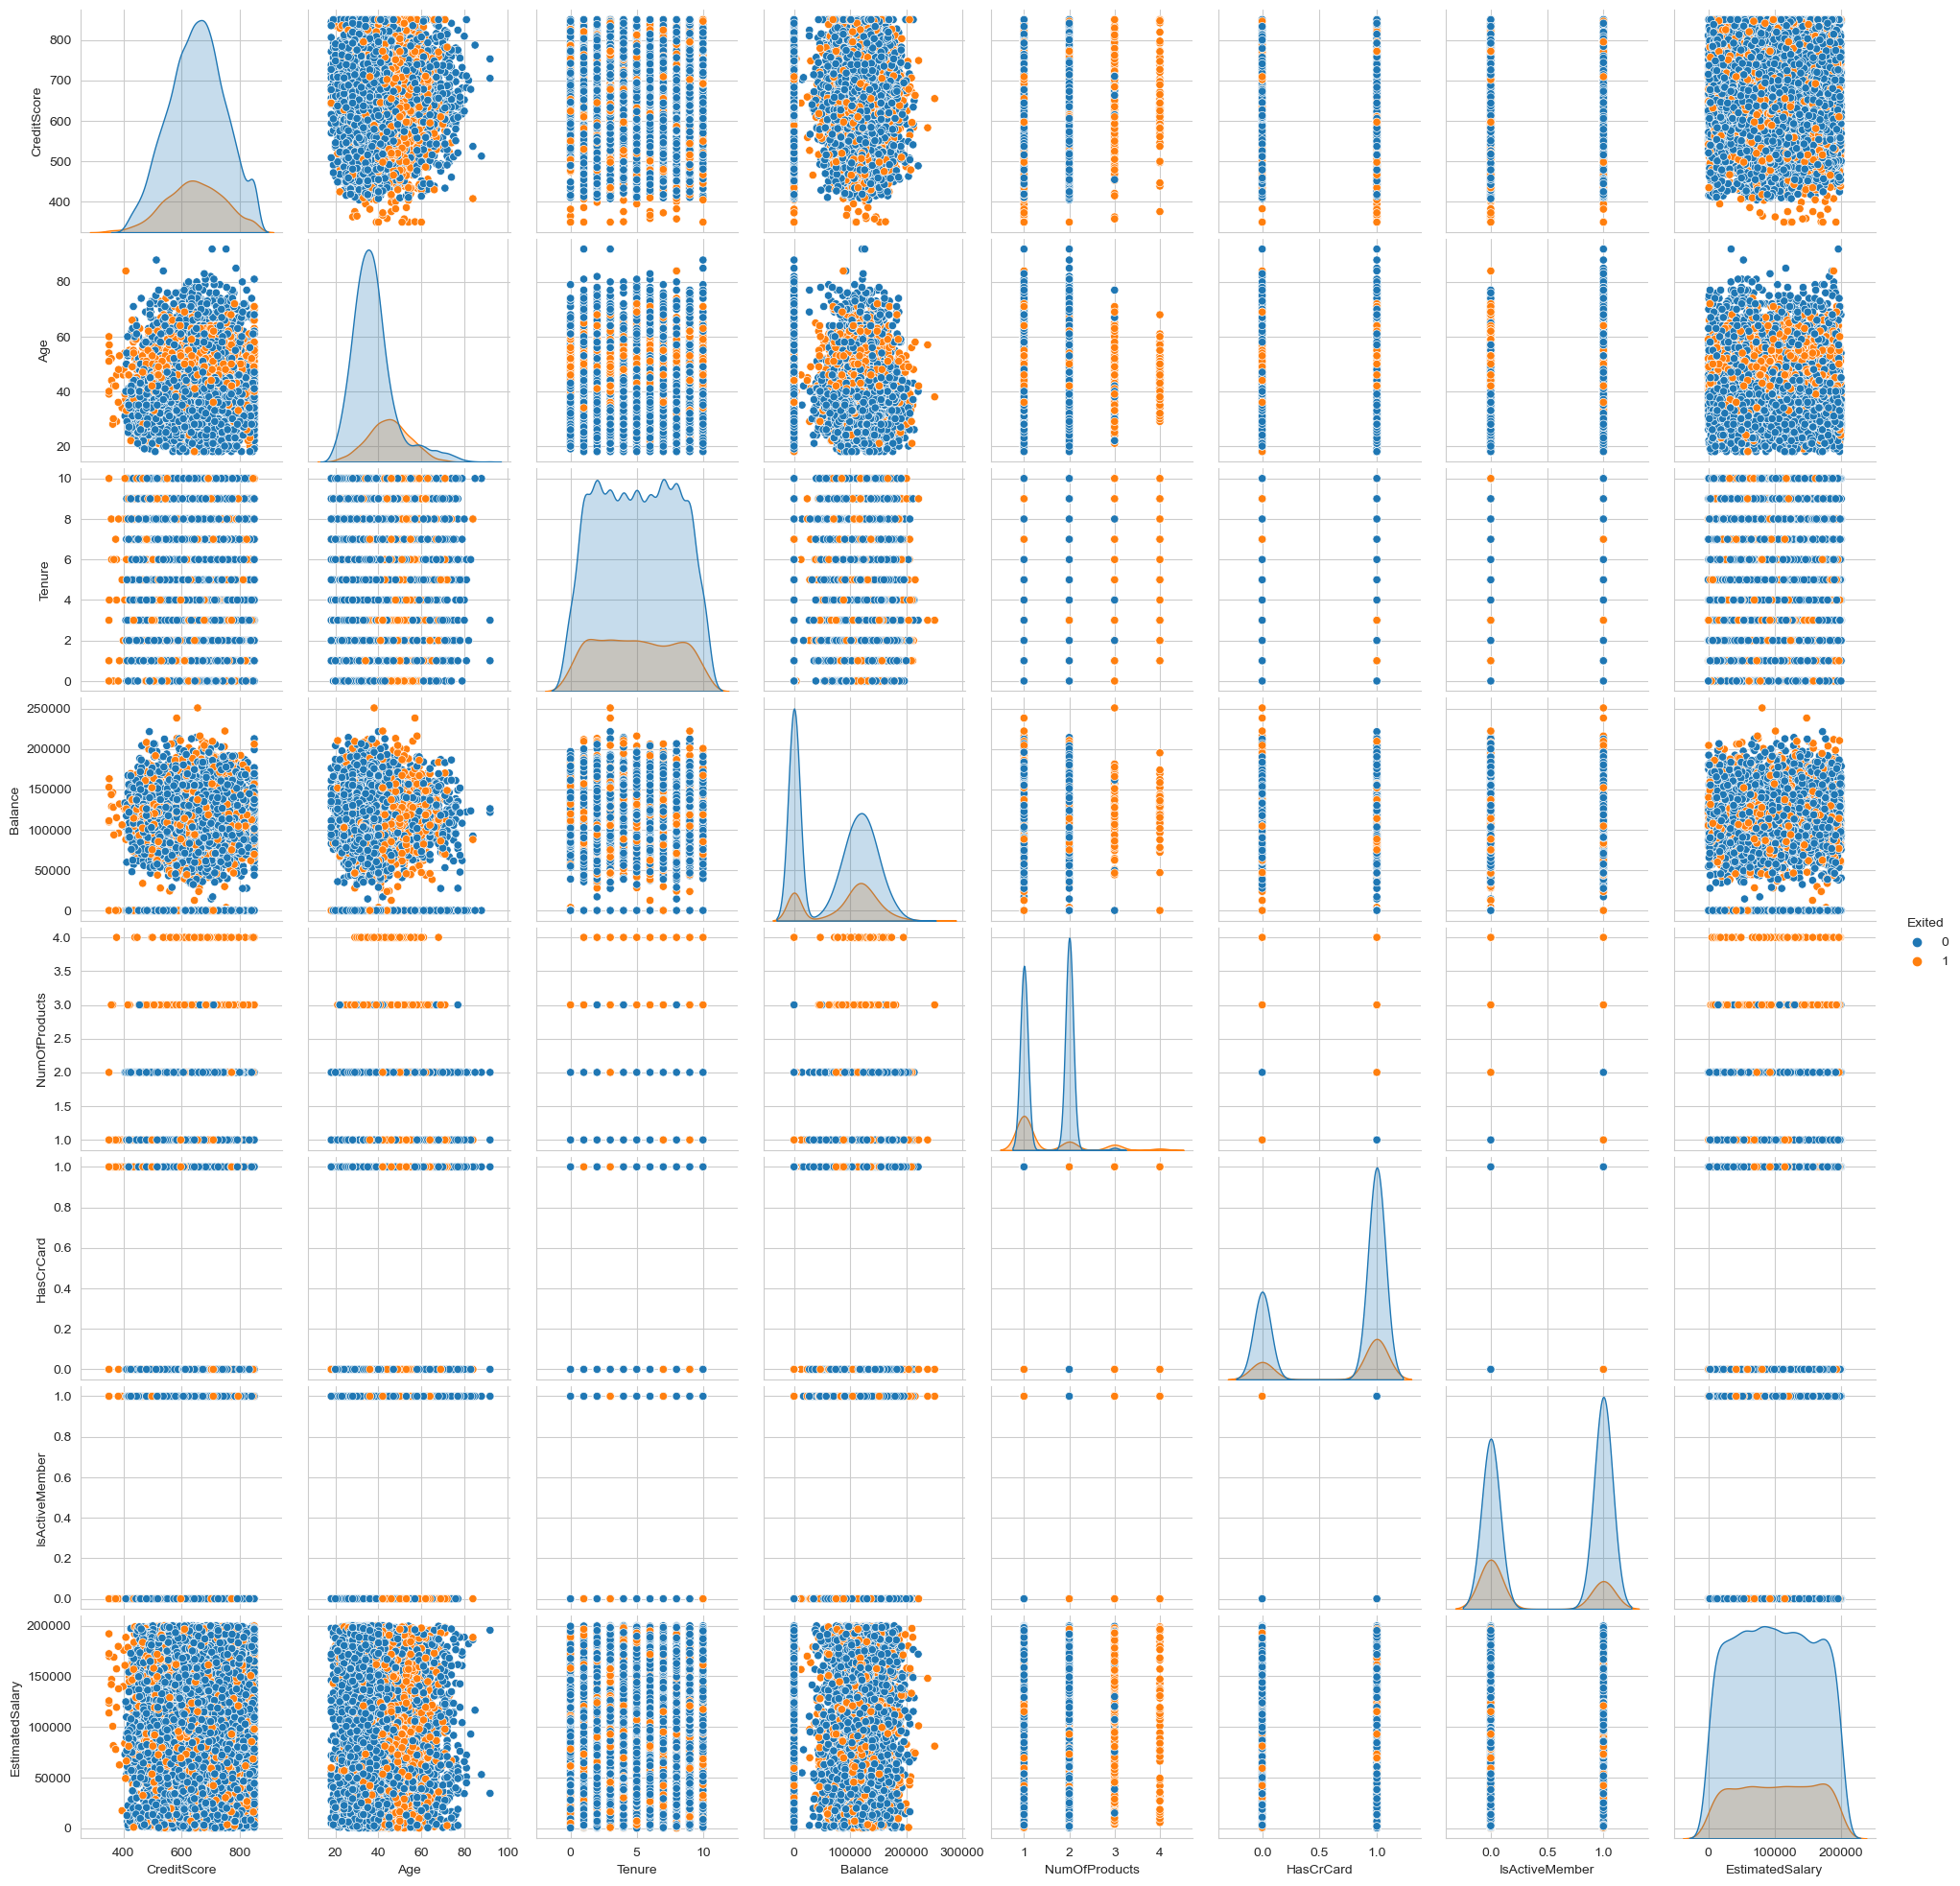

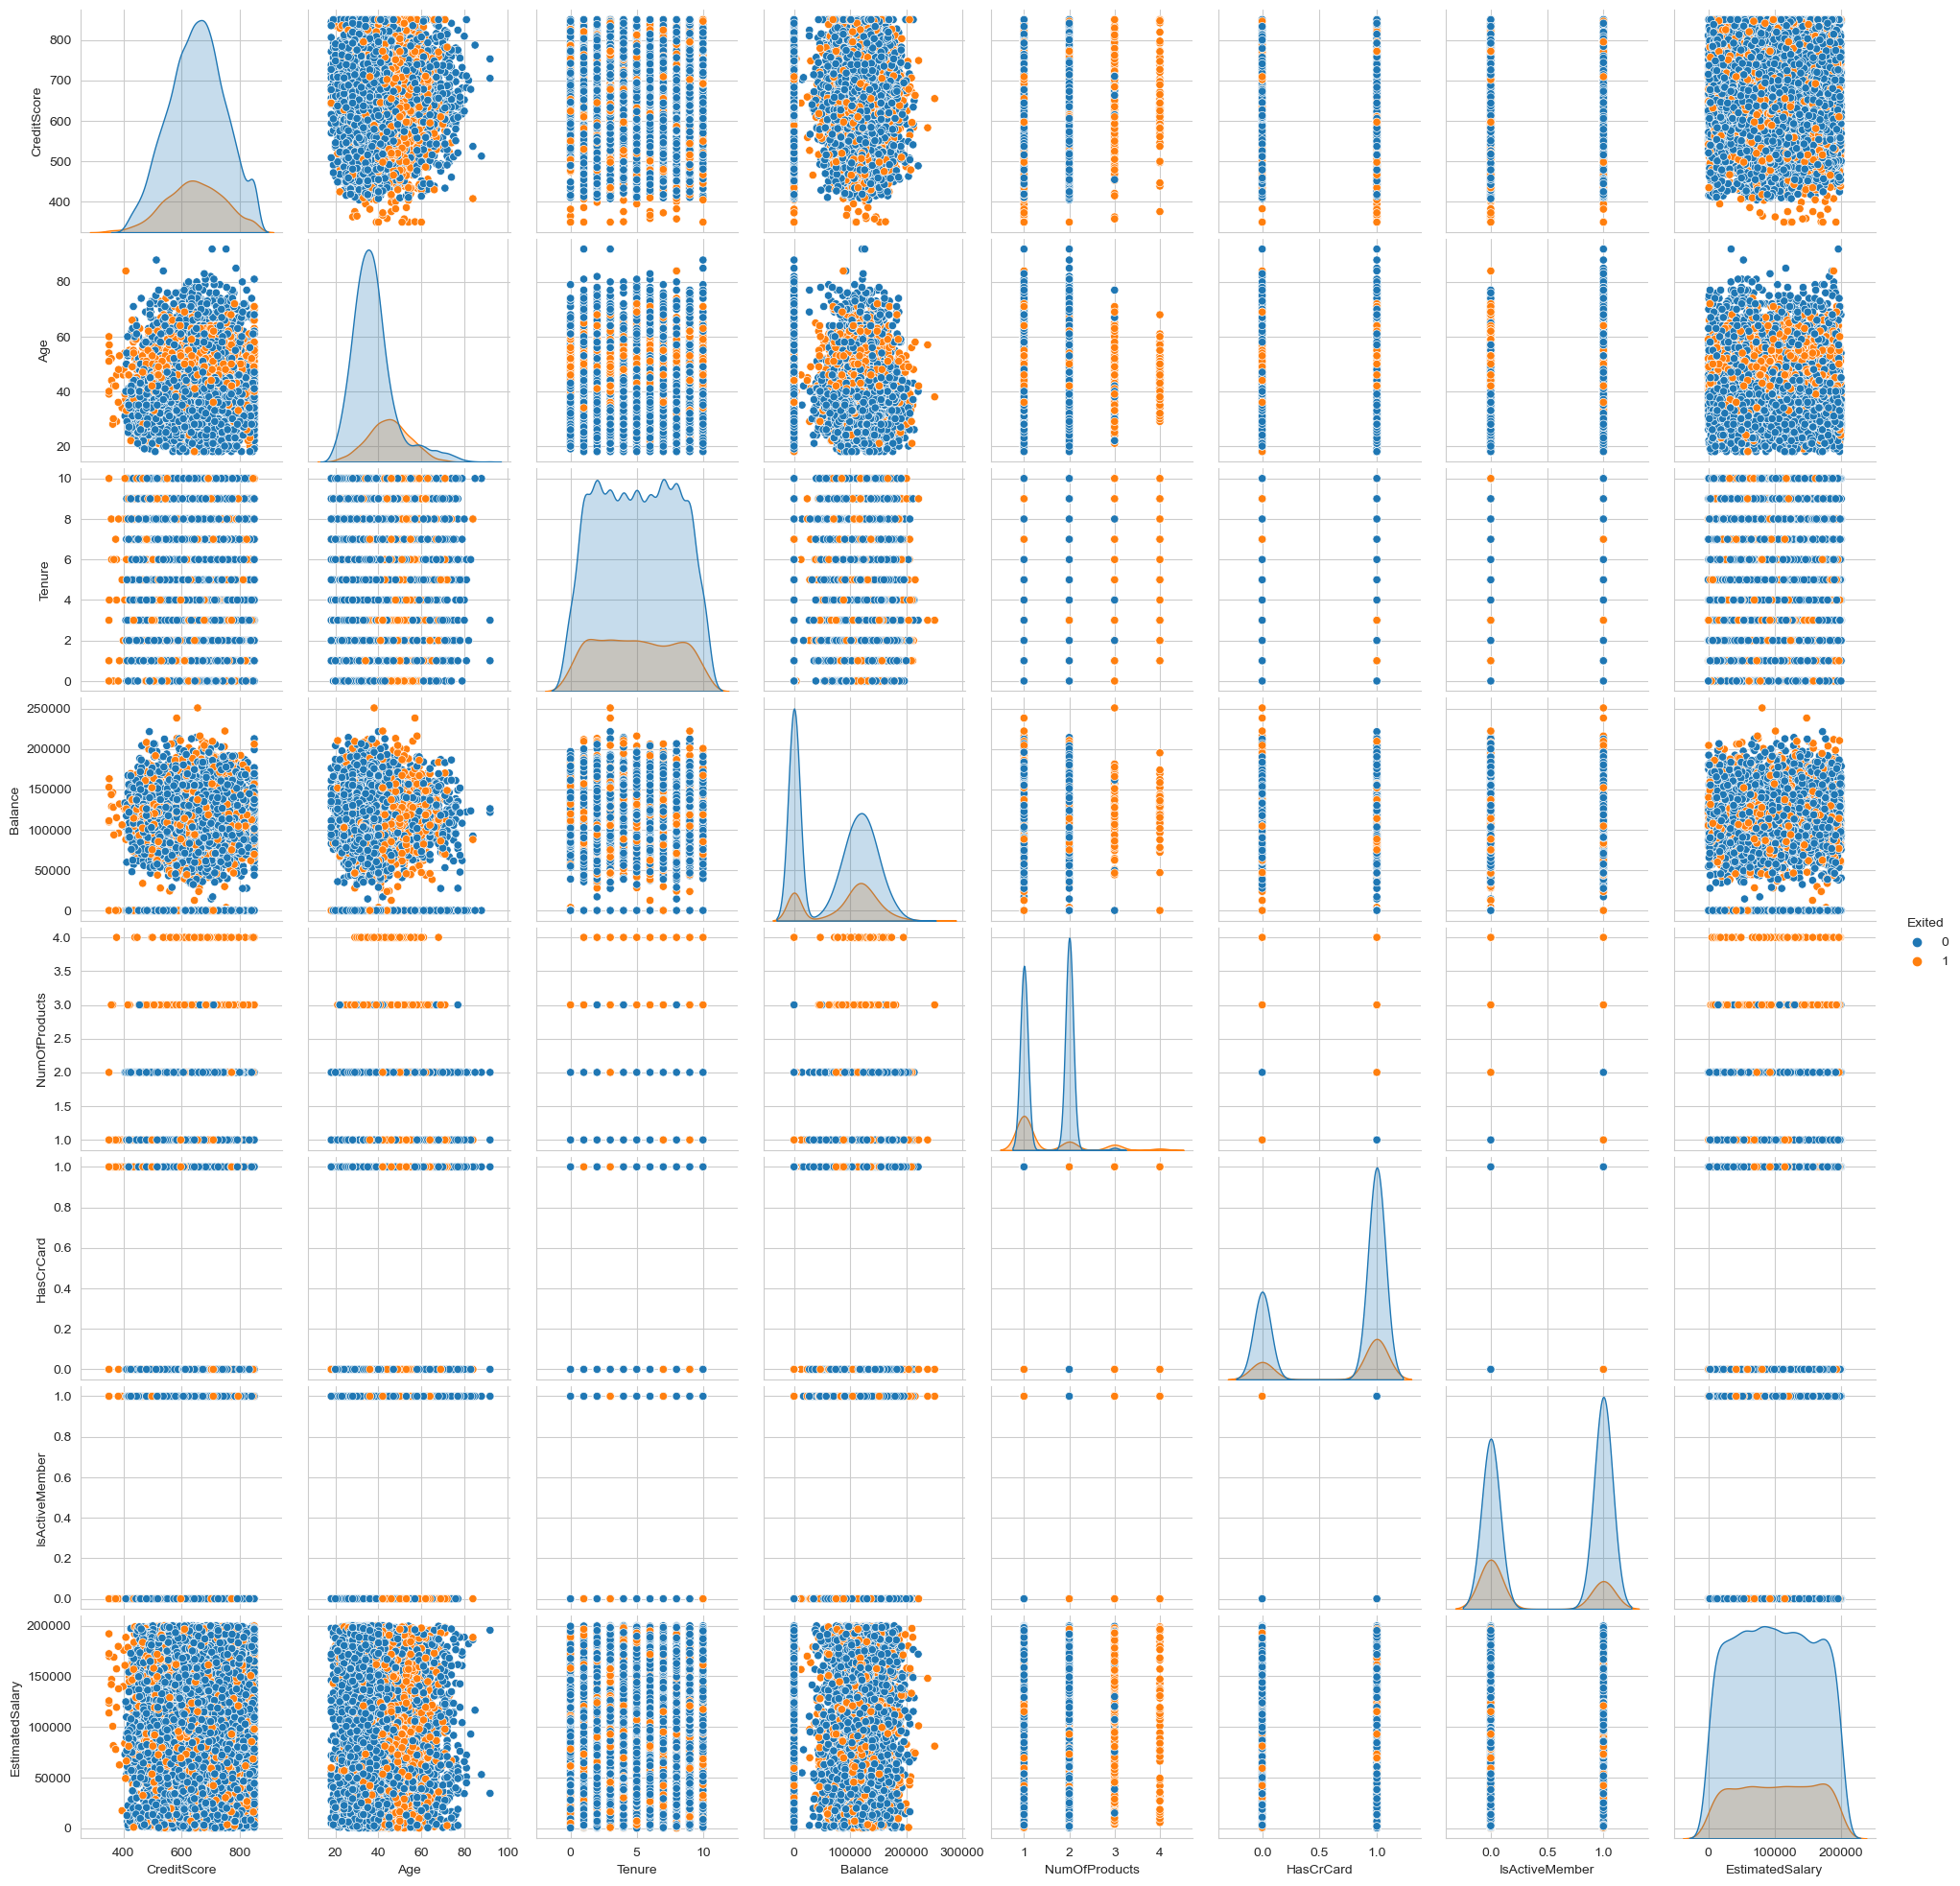

In [14]:
sns.pairplot(df,hue="Exited")
plt.show()

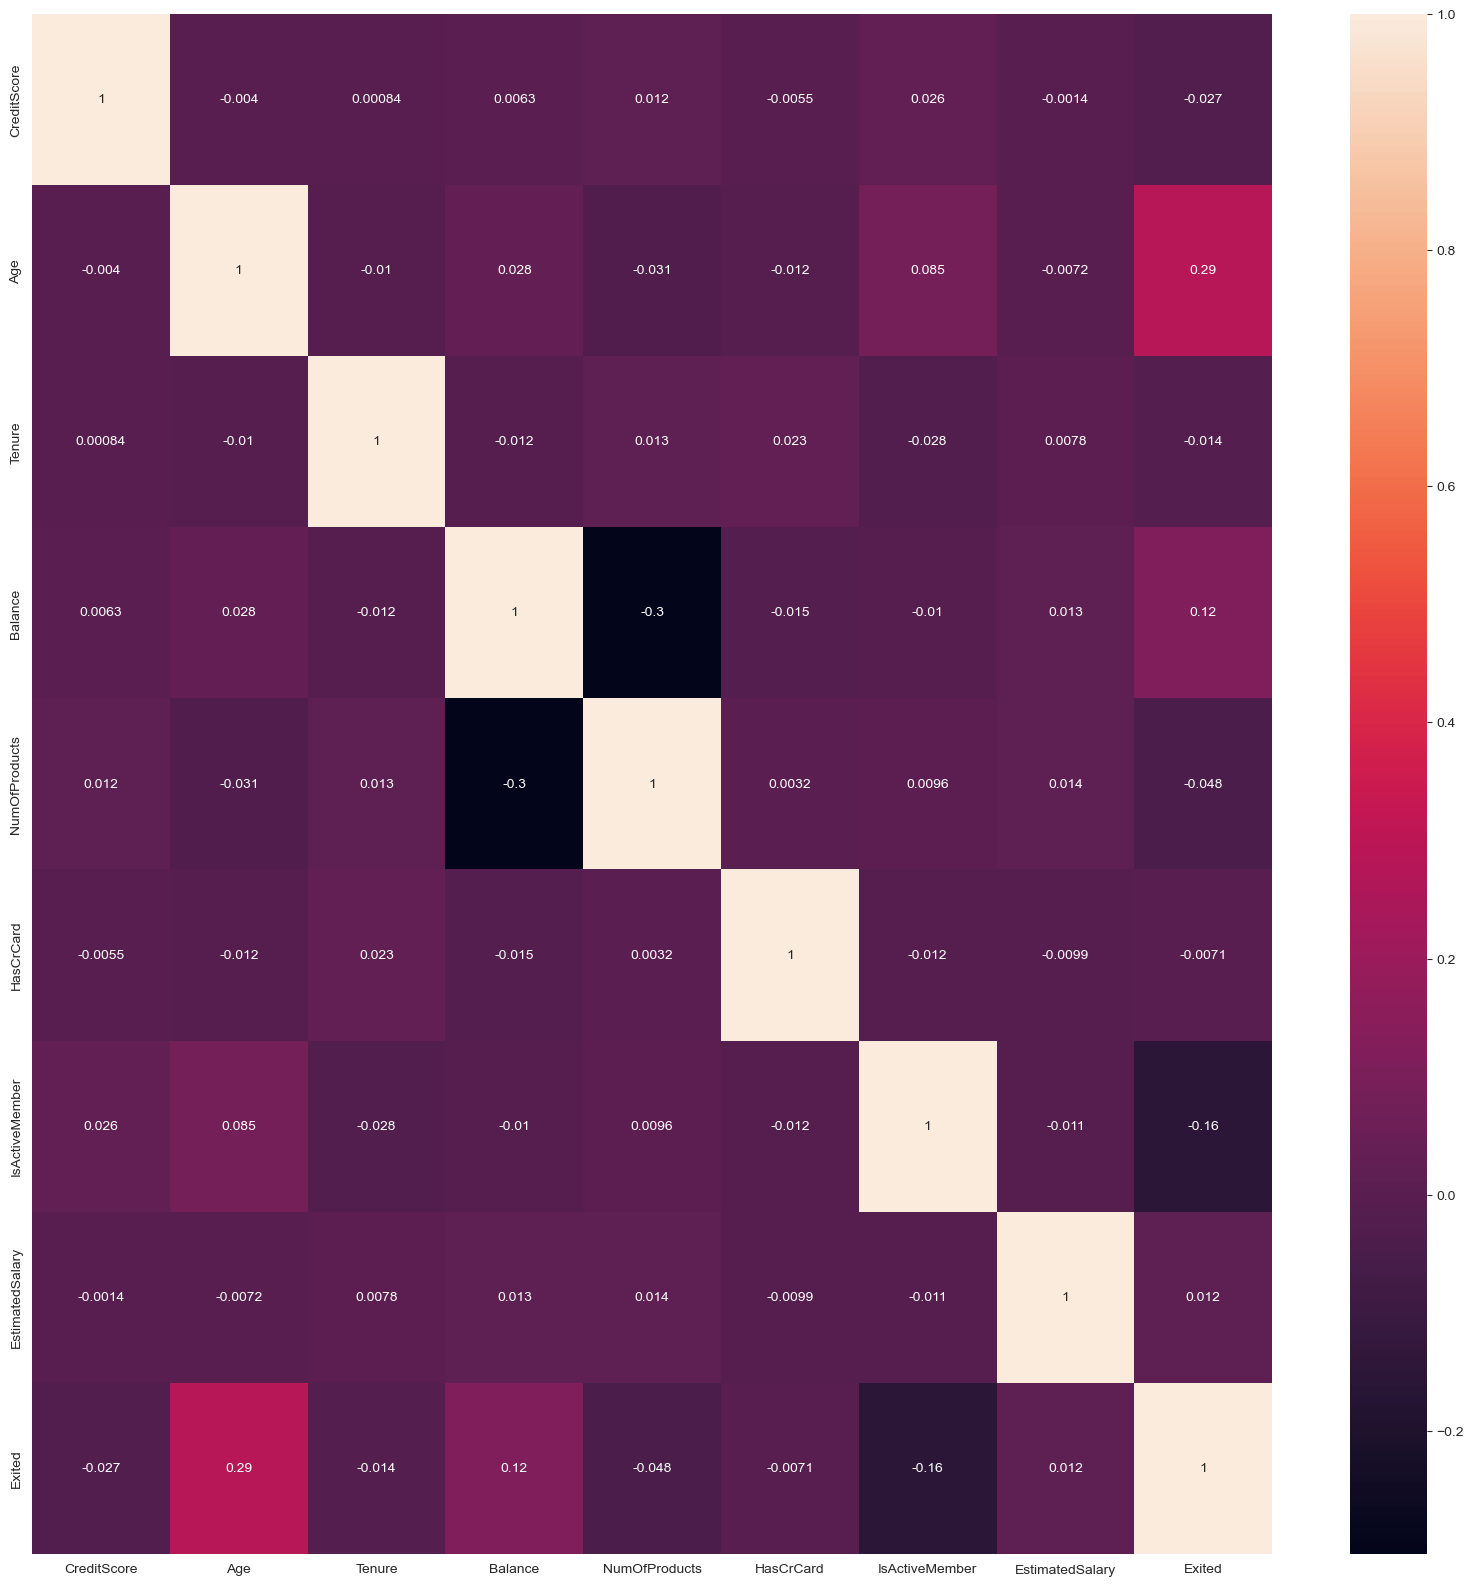

In [20]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True)
plt.show()

dtype('O')

In [21]:
tf.keras.utils.to_categorical(df[df.columns == 'object'])

NameError: name 'tf' is not defined

# Preprocessing of Data
- Train | Test Split, Scalling

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import make_column_transformer

In [38]:
X = df.drop('Exited', axis=1)
y = df['Exited']

In [39]:
seed = 42

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.10, random_state = seed)

In [41]:
cat = X_train.select_dtypes("object").columns.to_list()
column_trans = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse=False), cat),
    remainder=MinMaxScaler()
)

In [42]:
X_train = column_trans.fit_transform(X_train)
X_test = column_trans.transform(X_test)

# Modelling & Model Performance

## without class_weigth

### Create The Model

In [43]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_roc_curve, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

In [44]:
X_train.shape

(9000, 13)

In [45]:
X_test.shape

(1000, 13)

In [46]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(20, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(10, activation = "relu"))
model.add(Dense(5, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [47]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 64, epochs = 500, verbose=1)

Epoch 1/500
127/127 [==============================] - 3s 9ms/step - loss: 0.6773 - accuracy: 0.6940 - val_loss: 0.6155 - val_accuracy: 0.7989
Epoch 2/500
127/127 [==============================] - 0s 4ms/step - loss: 0.5286 - accuracy: 0.7960 - val_loss: 0.4835 - val_accuracy: 0.7989
Epoch 3/500
127/127 [==============================] - 0s 4ms/step - loss: 0.4812 - accuracy: 0.7960 - val_loss: 0.4640 - val_accuracy: 0.7989
Epoch 4/500
127/127 [==============================] - 0s 4ms/step - loss: 0.4687 - accuracy: 0.7960 - val_loss: 0.4515 - val_accuracy: 0.7989
Epoch 5/500
127/127 [==============================] - 0s 4ms/step - loss: 0.4612 - accuracy: 0.7974 - val_loss: 0.4430 - val_accuracy: 0.8000
Epoch 6/500
127/127 [==============================] - 1s 5ms/step - loss: 0.4531 - accuracy: 0.8016 - val_loss: 0.4333 - val_accuracy: 0.8067
Epoch 7/500
127/127 [==============================] - 1s 4ms/step - loss: 0.4406 - accuracy: 0.8075 - val_loss: 0.4132 - val_accuracy: 0.8278

Epoch 58/500
127/127 [==============================] - 1s 5ms/step - loss: 0.3377 - accuracy: 0.8601 - val_loss: 0.3047 - val_accuracy: 0.8844
Epoch 59/500
127/127 [==============================] - 1s 4ms/step - loss: 0.3370 - accuracy: 0.8609 - val_loss: 0.3025 - val_accuracy: 0.8844
Epoch 60/500
127/127 [==============================] - 0s 4ms/step - loss: 0.3364 - accuracy: 0.8612 - val_loss: 0.3029 - val_accuracy: 0.8822
Epoch 61/500
127/127 [==============================] - 1s 4ms/step - loss: 0.3361 - accuracy: 0.8601 - val_loss: 0.3053 - val_accuracy: 0.8878
Epoch 62/500
127/127 [==============================] - 1s 4ms/step - loss: 0.3363 - accuracy: 0.8606 - val_loss: 0.3110 - val_accuracy: 0.8900
Epoch 63/500
127/127 [==============================] - 1s 4ms/step - loss: 0.3353 - accuracy: 0.8609 - val_loss: 0.3052 - val_accuracy: 0.8844
Epoch 64/500
127/127 [==============================] - 1s 4ms/step - loss: 0.3361 - accuracy: 0.8628 - val_loss: 0.3040 - val_accuracy:

Epoch 115/500
127/127 [==============================] - 1s 4ms/step - loss: 0.3246 - accuracy: 0.8654 - val_loss: 0.2951 - val_accuracy: 0.8822
Epoch 116/500
127/127 [==============================] - 1s 4ms/step - loss: 0.3251 - accuracy: 0.8664 - val_loss: 0.2980 - val_accuracy: 0.8933
Epoch 117/500
127/127 [==============================] - 1s 4ms/step - loss: 0.3255 - accuracy: 0.8658 - val_loss: 0.2963 - val_accuracy: 0.8900
Epoch 118/500
127/127 [==============================] - 1s 4ms/step - loss: 0.3258 - accuracy: 0.8660 - val_loss: 0.2945 - val_accuracy: 0.8867
Epoch 119/500
127/127 [==============================] - 1s 4ms/step - loss: 0.3271 - accuracy: 0.8647 - val_loss: 0.2951 - val_accuracy: 0.8889
Epoch 120/500
127/127 [==============================] - 1s 5ms/step - loss: 0.3249 - accuracy: 0.8665 - val_loss: 0.2951 - val_accuracy: 0.8856
Epoch 121/500
127/127 [==============================] - 1s 4ms/step - loss: 0.3252 - accuracy: 0.8669 - val_loss: 0.2996 - val_ac

127/127 [==============================] - 1s 4ms/step - loss: 0.3217 - accuracy: 0.8675 - val_loss: 0.2975 - val_accuracy: 0.8800
Epoch 172/500
127/127 [==============================] - 1s 4ms/step - loss: 0.3210 - accuracy: 0.8678 - val_loss: 0.2990 - val_accuracy: 0.8800
Epoch 173/500
127/127 [==============================] - 1s 4ms/step - loss: 0.3203 - accuracy: 0.8660 - val_loss: 0.2984 - val_accuracy: 0.8856
Epoch 174/500
127/127 [==============================] - 1s 5ms/step - loss: 0.3207 - accuracy: 0.8669 - val_loss: 0.2938 - val_accuracy: 0.8800
Epoch 175/500
127/127 [==============================] - 1s 4ms/step - loss: 0.3200 - accuracy: 0.8673 - val_loss: 0.2947 - val_accuracy: 0.8833
Epoch 176/500
127/127 [==============================] - 1s 4ms/step - loss: 0.3197 - accuracy: 0.8679 - val_loss: 0.2961 - val_accuracy: 0.8789
Epoch 177/500
127/127 [==============================] - 0s 4ms/step - loss: 0.3201 - accuracy: 0.8674 - val_loss: 0.3004 - val_accuracy: 0.8856

127/127 [==============================] - 1s 5ms/step - loss: 0.3176 - accuracy: 0.8694 - val_loss: 0.2962 - val_accuracy: 0.8844
Epoch 228/500
127/127 [==============================] - 0s 4ms/step - loss: 0.3179 - accuracy: 0.8679 - val_loss: 0.2984 - val_accuracy: 0.8789
Epoch 229/500
127/127 [==============================] - 1s 4ms/step - loss: 0.3172 - accuracy: 0.8707 - val_loss: 0.2954 - val_accuracy: 0.8844
Epoch 230/500
127/127 [==============================] - 0s 4ms/step - loss: 0.3178 - accuracy: 0.8706 - val_loss: 0.2960 - val_accuracy: 0.8778
Epoch 231/500
127/127 [==============================] - 0s 4ms/step - loss: 0.3184 - accuracy: 0.8688 - val_loss: 0.2993 - val_accuracy: 0.8833
Epoch 232/500
127/127 [==============================] - 0s 4ms/step - loss: 0.3183 - accuracy: 0.8680 - val_loss: 0.2936 - val_accuracy: 0.8833
Epoch 233/500
127/127 [==============================] - 0s 4ms/step - loss: 0.3173 - accuracy: 0.8696 - val_loss: 0.2964 - val_accuracy: 0.8922

127/127 [==============================] - 1s 6ms/step - loss: 0.3169 - accuracy: 0.8684 - val_loss: 0.2997 - val_accuracy: 0.8844
Epoch 284/500
127/127 [==============================] - 1s 7ms/step - loss: 0.3152 - accuracy: 0.8694 - val_loss: 0.2971 - val_accuracy: 0.8756
Epoch 285/500
127/127 [==============================] - 1s 4ms/step - loss: 0.3161 - accuracy: 0.8699 - val_loss: 0.2938 - val_accuracy: 0.8800
Epoch 286/500
127/127 [==============================] - 0s 4ms/step - loss: 0.3155 - accuracy: 0.8691 - val_loss: 0.2968 - val_accuracy: 0.8878
Epoch 287/500
127/127 [==============================] - 0s 4ms/step - loss: 0.3167 - accuracy: 0.8668 - val_loss: 0.2978 - val_accuracy: 0.8833
Epoch 288/500
127/127 [==============================] - 1s 4ms/step - loss: 0.3158 - accuracy: 0.8699 - val_loss: 0.2965 - val_accuracy: 0.8844
Epoch 289/500
127/127 [==============================] - 1s 5ms/step - loss: 0.3160 - accuracy: 0.8672 - val_loss: 0.2976 - val_accuracy: 0.8900

127/127 [==============================] - 0s 4ms/step - loss: 0.3130 - accuracy: 0.8719 - val_loss: 0.2913 - val_accuracy: 0.8933
Epoch 340/500
127/127 [==============================] - 0s 4ms/step - loss: 0.3132 - accuracy: 0.8704 - val_loss: 0.2957 - val_accuracy: 0.8811
Epoch 341/500
127/127 [==============================] - 0s 4ms/step - loss: 0.3139 - accuracy: 0.8714 - val_loss: 0.2931 - val_accuracy: 0.8911
Epoch 342/500
127/127 [==============================] - 0s 4ms/step - loss: 0.3124 - accuracy: 0.8719 - val_loss: 0.2920 - val_accuracy: 0.8811
Epoch 343/500
127/127 [==============================] - 0s 4ms/step - loss: 0.3136 - accuracy: 0.8688 - val_loss: 0.3000 - val_accuracy: 0.8856
Epoch 344/500
127/127 [==============================] - 0s 4ms/step - loss: 0.3122 - accuracy: 0.8721 - val_loss: 0.2953 - val_accuracy: 0.8833
Epoch 345/500
127/127 [==============================] - 1s 5ms/step - loss: 0.3142 - accuracy: 0.8704 - val_loss: 0.2928 - val_accuracy: 0.8878

127/127 [==============================] - 0s 3ms/step - loss: 0.3124 - accuracy: 0.8712 - val_loss: 0.2939 - val_accuracy: 0.8867
Epoch 396/500
127/127 [==============================] - 0s 3ms/step - loss: 0.3127 - accuracy: 0.8683 - val_loss: 0.2954 - val_accuracy: 0.8811
Epoch 397/500
127/127 [==============================] - 1s 4ms/step - loss: 0.3110 - accuracy: 0.8720 - val_loss: 0.2988 - val_accuracy: 0.8867
Epoch 398/500
127/127 [==============================] - 1s 5ms/step - loss: 0.3106 - accuracy: 0.8714 - val_loss: 0.2922 - val_accuracy: 0.8867
Epoch 399/500
127/127 [==============================] - 1s 6ms/step - loss: 0.3103 - accuracy: 0.8714 - val_loss: 0.2948 - val_accuracy: 0.8878
Epoch 400/500
127/127 [==============================] - 1s 5ms/step - loss: 0.3104 - accuracy: 0.8719 - val_loss: 0.2917 - val_accuracy: 0.8867
Epoch 401/500
127/127 [==============================] - 1s 6ms/step - loss: 0.3114 - accuracy: 0.8696 - val_loss: 0.2911 - val_accuracy: 0.8878

127/127 [==============================] - 0s 4ms/step - loss: 0.3093 - accuracy: 0.8728 - val_loss: 0.2976 - val_accuracy: 0.8867
Epoch 452/500
127/127 [==============================] - 1s 7ms/step - loss: 0.3093 - accuracy: 0.8719 - val_loss: 0.2998 - val_accuracy: 0.8878
Epoch 453/500
127/127 [==============================] - 0s 3ms/step - loss: 0.3104 - accuracy: 0.8712 - val_loss: 0.2931 - val_accuracy: 0.8822
Epoch 454/500
127/127 [==============================] - 0s 4ms/step - loss: 0.3104 - accuracy: 0.8717 - val_loss: 0.2969 - val_accuracy: 0.8789
Epoch 455/500
127/127 [==============================] - 1s 5ms/step - loss: 0.3095 - accuracy: 0.8736 - val_loss: 0.3024 - val_accuracy: 0.8811
Epoch 456/500
127/127 [==============================] - 1s 4ms/step - loss: 0.3088 - accuracy: 0.8723 - val_loss: 0.2980 - val_accuracy: 0.8811
Epoch 457/500
127/127 [==============================] - 1s 4ms/step - loss: 0.3089 - accuracy: 0.8743 - val_loss: 0.2977 - val_accuracy: 0.8833

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [48]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                280       
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 5)                 55        
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 551
Trainable params: 551
Non-trainable params: 0
_________________________________________________________________


In [49]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

loss  accuracy  val_loss  val_accuracy
0 0.677     0.694     0.616         0.799
1 0.529     0.796     0.483         0.799
2 0.481     0.796     0.464         0.799
3 0.469     0.796     0.452         0.799
4 0.461     0.797     0.443         0.800

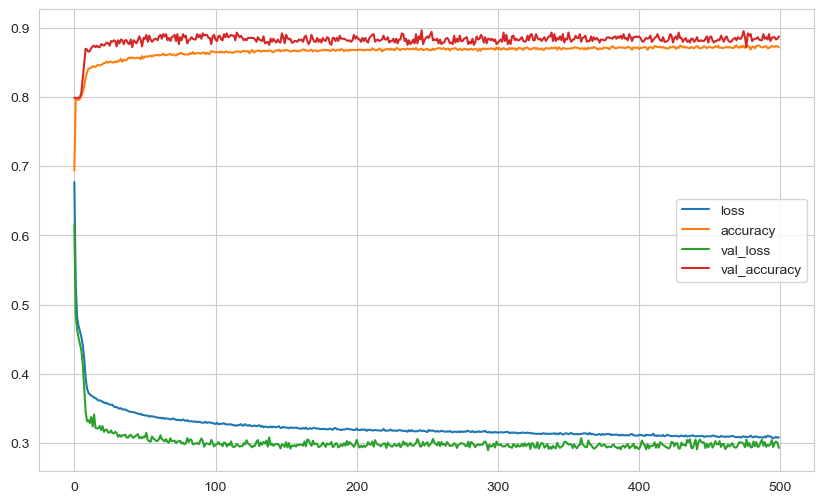

In [50]:
loss_df.plot()
plt.show()

In [51]:
model.evaluate(X_test, y_test, verbose=0)

[0.34107059240341187, 0.8610000014305115]

In [52]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.34107059240341187
accuracy :  0.8610000014305115


In [53]:
y_pred = model.predict(X_test) > 0.5 #Tensorflow yeni haliyle proba ları veriyor, 
#0 - 1 şeklinde sonuç vermesi için bu şekilde yazıyoruz.
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 3ms/step
[[751  45]
 [ 94 110]]
              precision    recall  f1-score   support

           0       0.89      0.94      0.92       796
           1       0.71      0.54      0.61       204

    accuracy                           0.86      1000
   macro avg       0.80      0.74      0.76      1000
weighted avg       0.85      0.86      0.85      1000



## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

### Create The Model

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method 

### Increase The Learning Rate and Observe The Results

### Add Dropout Layer

### Add Early Stop

#### Monitor the "val_loss" as metric

#### Monitor the "val_recall" as metric

## GridSearchCV

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

# Final Model and Model Deployment

## Prediction

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___